In [1]:
from fastai.vision import *

In [2]:
from pathlib import Path
import gc

In [2]:
common_path = Path('./tutorials')
data_path = common_path/'data'

data_csv = data_path/'train.csv'

size_1 = 112
size_2 = 224
bs=32

In [3]:
df = pd.read_csv(data_csv, header='infer')

id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0

#### Clean ambigous duplicates

In [4]:
dup_labels = ['0ac436400db4', '0cb14014117d', '14e3f84445f7', '1632c4311fc9', '1c4d87baaffc', '1c9c583c10bf', '278aa860dffd', '2df07eb5779f', '2f7789c1e046', '30cab14951ac', '35aa7f5c2ec0', '3cd801ffdbf0', '3dbfbc11e105', '3ee4841936ef', '42985aa2e32f', '42a850acd2ac', '46cdc8b685bd', '4a44cc840ebe', '4fecf87184e6', '51131b48f9d4', '521d3e264d71', '5e7db41b3bee', '5eb311bcb5f9', '60f15dd68d30', '6165081b9021', '6253f23229b1', '7005be54cab1', '7525ebb3434d', '76cfe8967f7d', '80964d8e0863', '8446826853d0', '8cb6b0efaaac', '8ef2eb8c51c4', '98f7136d2e7a', '9a3c03a5ad0f', '9bf060db8376', '9e3510963315', 'a1b12fdce6c3', 'a75bab2463d4', 'a8e88d4891c4', 'a9e984b57556', 'ab50123abadb', 'b187b3c93afb', 'b9127e38d9b9', 'b91ef82e723a', 'bacfb1029f6b', 'c546670d9684', 'd0079cc188e9', 'e12d41e7b221', 'e39b627cf648', 'e4151feb8443', 'e740af6ac6ea', 'e8d1c6c07cf2', 'ea15a290eb96', 'f03d3c4ce7fb', 'f066db7a2efe', 'f0f89314e860', 'f23902998c21', 'f7edc074f06b', 'fcc6aa6755e6', 'fda39982a810', 'fe0fc67c7980', '01c31b10ab99', '848091b1f5d0', 'b29bd35acaf6']

In [5]:
df = df[df['id_code'].apply(lambda x: x not in dup_labels)]

In [10]:
df['id_code'] = df['id_code'].apply(lambda id_code: 'train/' + id_code + '.png')

In [11]:
df.head()

id_code  diagnosis
0  train/000c1434d8d7.png          2
1  train/001639a390f0.png          4
2  train/0024cdab0c1e.png          1
3  train/002c21358ce6.png          0
4  train/005b95c28852.png          0

#### Data agumentation

In [6]:
tfms = get_transforms(flip_vert=False, max_zoom=1.2, max_warp=0.0)

In [7]:
def get_data(df, size, bs):
    return ImageDataBunch.from_df(data_path, df, ds_tfms=tfms, size=size, bs=bs).normalize(imagenet_stats)

In [12]:
data = get_data(df, size_1, bs)

In [13]:
print(data.classes)
len(data.classes),data.c

[0, 1, 2, 3, 4]


(5, 5)

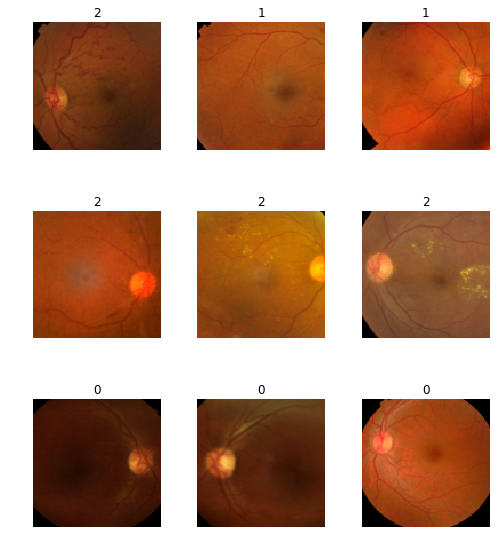

In [14]:
data.show_batch(rows=3, figsize=(7, 8))

In [15]:
kappa = KappaScore()
kappa.weights = "quadratic"
precision = Precision(average='micro')
recall = Recall(average='micro')
f1 = FBeta(average='micro')

### Scores
## Cleaned unambigous label


## With unambigous labels!!!
### img size = 24, bs = 64
#### resnet34
```
train_loss 	valid_loss 	accuracy 	kappa_score 	precision 	recall 	f_beta
0.819783 	0.815637 	0.703552 	0.655068 	0.703552 	0.703552 	0.703552  8ep
0.727389 	0.759506 	0.725410 	0.728208 	0.725410 	0.725410 	0.725410  16ep
0.657729 	0.736126 	0.730874 	0.745882 	0.730874 	0.730874 	0.730874  31ep
```

#### resnet152
```
train_loss 	valid_loss 	accuracy 	kappa_score 	precision 	recall 	f_beta
0.764820 	0.797615 	0.703552 	0.672312 	0.703552 	0.703552 	0.703552  8ep
0.680763 	0.740312 	0.739071 	0.736191 	0.739071 	0.739071 	0.739071  14ep
0.595458 	0.707704 	0.736339 	0.762468 	0.736339 	0.736339 	0.736339  22ep
```

### img size = 224, bs = 64
#### resnet152
```
train_loss 	valid_loss 	accuracy 	kappa_score 	precision 	recall 	f_beta
0.354567 	0.425411 	0.845628 	0.898112 	0.845628 	0.845628 	0.845628
```

### img size = 326, bs = 16
#### resnet152
```
train_loss 	valid_loss 	accuracy 	kappa_score 	precision 	recall 	f_beta
0.463728 	0.422149 	0.831967 	0.895391 	0.831967 	0.831967 	0.831967 	
```


### img size = 512, bs = 16
#### resnet152
```
train_loss 	valid_loss 	accuracy 	kappa_score 	precision 	recall 	f_beta
0.486395 	0.450537 	0.834699 	0.897809 	0.834699 	0.834699 	0.834700
```

### img size = 112 -> 224, bs = 64
#### resnet152
```
train_loss 	valid_loss 	accuracy 	kappa_score 	precision 	recall 	f_beta
0.505185 	0.432382 	0.845628 	0.908263 	0.845628 	0.845628 	0.845628
```

### img size = 112 -> 224, bs = 84
#### resnet152
```
0.503321 	0.411727 	0.859290 	0.915039 	0.859290 	0.859290 	0.859290
```

### img size = 224 -> 448, bs = 64
```
train_loss 	valid_loss 	accuracy 	kappa_score 	precision 	recall 	f_beta
0.491678 	0.453350 	0.819672 	0.880364 	0.819672 	0.819672 	0.819672
```

### img size = 224 -> 512, bs = 48
```
train_loss 	valid_loss 	accuracy 	kappa_score 	precision 	recall 	f_beta
0.543855 	0.455350 	0.836066 	0.871621 	0.836066 	0.836066 	0.836066
```


In [16]:
learn = cnn_learner(data, models.resnet152, metrics=[accuracy, kappa, precision, recall, f1])

In [17]:
learn.model = torch.nn.DataParallel(learn.model)

In [18]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.51E-03
Min loss divided by 10: 3.31E-03


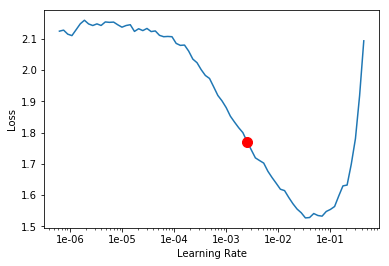

In [19]:
# learn.lr_find()
# learn.recorder.plot(suggestion=True)

In [20]:
learn.fit_one_cycle(4, max_lr=1e-3)

In [ ]:
#learn.unfreeze()

In [17]:
# learn.lr_find()
# learn.recorder.plot(suggestion=True)

In [18]:
#learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

In [21]:
data = get_data(size_2, bs)
learn.data = data

In [ ]:
# learn.lr_find()
# learn.recorder.plot(suggestion=True)

In [22]:
learn.fit_one_cycle(6, max_lr=1e-3)

In [23]:
learn.unfreeze()

In [24]:
# learn.lr_find()
# learn.recorder.plot(suggestion=True)

In [25]:
learn.fit_one_cycle(8, max_lr=slice(1e-7, 1e-5))

OSError: [Errno 12] Cannot allocate memory

In [63]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

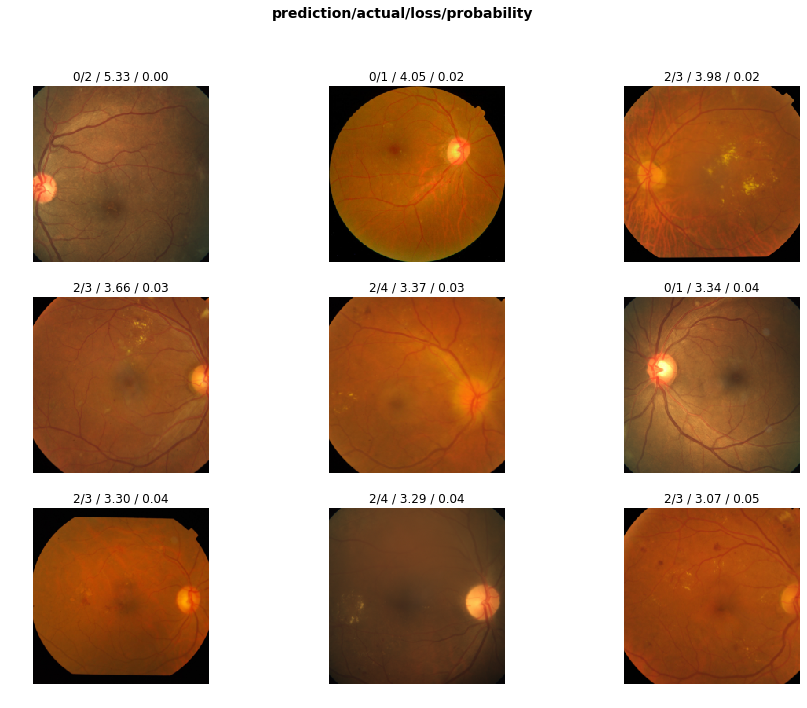

In [64]:
interp.plot_top_losses(9, figsize=(15,11))

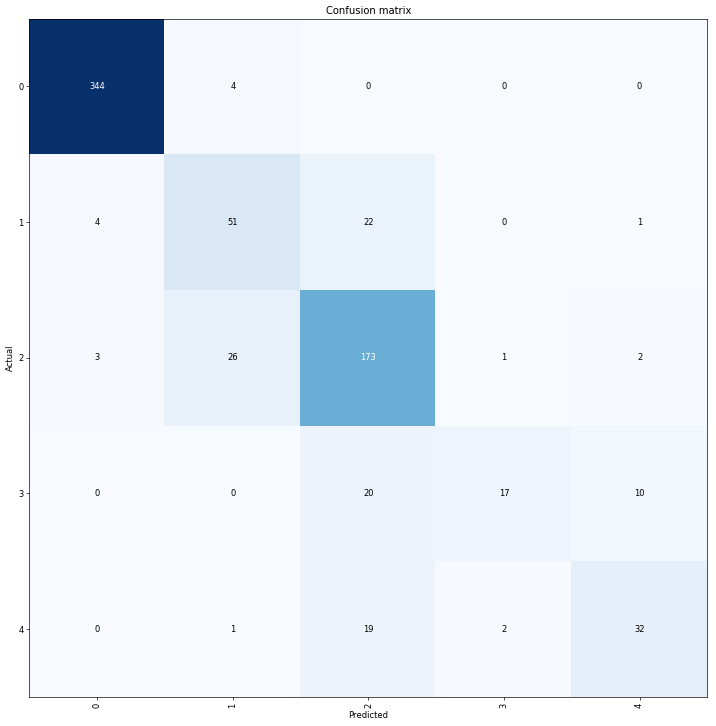

In [65]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [66]:
interp.most_confused(min_val=2)

[(2, 1, 26),
 (1, 2, 22),
 (3, 2, 20),
 (4, 2, 19),
 (3, 4, 10),
 (0, 1, 4),
 (1, 0, 4),
 (2, 0, 3),
 (2, 4, 2),
 (4, 3, 2)]

In [67]:
learn.model = learn.model.module

In [68]:
learn.path

PosixPath('tutorials/data')

In [69]:
learn.export('export_trained_res152_aptos_model.pkl')

In [70]:
learn.save("trained_res152_aptos_model.pkl")